In [0]:
#importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#parameters
learning_rate = 0.001
epochs = 1000
step = 100

In [3]:
#training data 
X_train = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y_train = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X_train.shape[0]
np.random.seed(1)
print(n_samples)

17


In [0]:
#graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [0]:
#weights and biases
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [0]:
#linear model
pred = tf.add(tf.multiply(X,W),b)


In [0]:
#cost function - mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y,2))/n_samples
#gradient descent
optimizer  = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
#variables initializer
init = tf.global_variables_initializer()

Epoch 0 cost 51.337345123291016 W 1.5244466066360474 b -0.6254837512969971
Epoch 100 cost 0.4455842673778534 W 0.4672960937023163 b -0.7363121509552002
Epoch 200 cost 0.4317348599433899 W 0.4619843661785126 b -0.6994198560714722
Epoch 300 cost 0.4185330271720886 W 0.45691853761672974 b -0.6633959412574768
Epoch 400 cost 0.4059593081474304 W 0.4519747793674469 b -0.6282409429550171
Epoch 500 cost 0.3939821124076843 W 0.4471496045589447 b -0.5939285159111023
Epoch 600 cost 0.38257378339767456 W 0.4424402415752411 b -0.5604407787322998
Epoch 700 cost 0.3717077970504761 W 0.43784433603286743 b -0.5277593731880188
Epoch 800 cost 0.36135736107826233 W 0.4333586096763611 b -0.4958614408969879
Epoch 900 cost 0.35149914026260376 W 0.4289811849594116 b -0.46473193168640137
Epoch 1000 cost 0.34210899472236633 W 0.4247085154056549 b -0.43434974551200867
training_cost= 0.342109


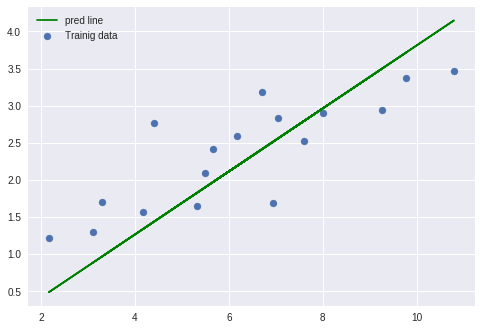

In [9]:
#training
with tf.Session() as sess:
  sess.run(init)
  #print(W.eval(),b.eval())
  
  for epoch in range(epochs+1):
    for (x, y) in zip(X_train, Y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})
    if ((epoch) % step) == 0:
      c = sess.run(cost, feed_dict = {X:X_train, Y:Y_train})
      print("Epoch {} cost {} W {} b {}".format(epoch,c,\
                                                sess.run(W),
                                                sess.run(b)))
  training_cost = sess.run(cost, feed_dict = {X:X_train, Y:Y_train})
  print("training_cost=",training_cost) 
  
  #plotting
  plt.scatter(X_train,Y_train,label = "Trainig data")
  plt.plot(X_train,sess.run(W) * X_train + sess.run(b),color = "green",\
           label = "pred line")
  plt.legend()
  plt.show()
sess.close()
